<a href="https://colab.research.google.com/github/descandon88/Analisis-de-datos-social/blob/main/analisis_de_centralidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
# Permiso para acceder a drive desde colab
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
df_tweets=pd.read_csv('/content/drive/My Drive/ADS/tweets.csv')
df_tweets.head()

,user_id_tw,user_id,tweet_id,text,date,likes,rts,respuesta_a_tweet_id,respuesta_a_user_id,respuesta_a_user_screen_name
0,69139927,AldoLema_uy,1387747570508877825,Durante el primer trimestre se mantuvo el dina...,2021-04-29 12:36:18,9,2,NaN,NaN,NaN
1,69139927,AldoLema_uy,1387722124454891525,Respecto a la relación de Biden y los demócrat...,2021-04-29 10:55:11,2,0,NaN,NaN,NaN
2,69139927,AldoLema_uy,1387717584854921222,A 100 días de haber asumido y tras su discurso...,2021-04-29 10:37:09,3,0,NaN,NaN,NaN
3,69139927,AldoLema_uy,1387702441420935171,La empresa uruguaya de pagos @dLocalPayments s...,2021-04-29 09:36:58,4,0,NaN,NaN,NaN
4,69139927,AldoLema_uy,1387687245008752645,La cadena cárnica uruguaya pagó US$ 198 millon...,2021-04-29 08:36:35,24,10,NaN,NaN,NaN


In [5]:
!pip install networkx


In [6]:
import networkx as nx


In [7]:
## Elimino las celdas vacías y lo agrego a un dataframe nuevo df1
df1 = df_tweets
df1 = df1.dropna()
df1.head()

,user_id_tw,user_id,tweet_id,text,date,likes,rts,respuesta_a_tweet_id,respuesta_a_user_id,respuesta_a_user_screen_name
13,69139927,AldoLema_uy,1387536693343965190,"Con 2.497 fallecidos totales, 2.939 casos hoy,...",2021-04-28 22:38:21,8,6,1.387535e+18,69139927.0,AldoLema_uy
27,69139927,AldoLema_uy,1387176212674535432,"Con 2.452 fallecidos totales, 2.769 casos hoy,...",2021-04-27 22:45:56,2,1,1.387173e+18,69139927.0,AldoLema_uy
36,69139927,AldoLema_uy,1387040282999283718,@mrodrigfeed Me imaginaba que era 1986: U2 en ...,2021-04-27 13:45:48,3,0,1.387040e+18,568490386.0,mrodrigfeed
37,69139927,AldoLema_uy,1387038518992457736,@mrodrigfeed 20 de setiembre de 198_?,2021-04-27 13:38:47,3,0,1.387037e+18,568490386.0,mrodrigfeed
39,69139927,AldoLema_uy,1386993433575821313,@JavierdeHaedo De acuerdo que no era serio. Pe...,2021-04-27 10:39:38,11,1,1.386990e+18,356460604.0,JavierdeHaedo


In [8]:
G = nx.from_pandas_edgelist(df1, source='user_id', target='respuesta_a_user_screen_name', edge_attr=True,)


In [16]:
degree_cent = nx.algorithms.degree_centrality(G)
print(degree_cent)

{'AldoLema_uy': 0.04807692307692308, 'mrodrigfeed': 0.004807692307692308, 'JavierdeHaedo': 0.04326923076923077, 'CarlosDCarvallo': 0.004807692307692308, 'Juan_Guerra_1': 0.004807692307692308, 'sgc_econ': 0.08173076923076923, 'ShaatDana': 0.004807692307692308, 'GonzaBohemio': 0.004807692307692308, 'ptanurev': 0.004807692307692308, 'MatiDodel': 0.004807692307692308, 'mativiera1': 0.004807692307692308, 'AndrewG_PhD': 0.004807692307692308, 'economicliberal': 0.004807692307692308, 'sebafle': 0.004807692307692308, 'Matias__Brum': 0.014423076923076924, 'GerardoLicandro': 0.02403846153846154, 'CSociales_UCU': 0.004807692307692308, 'Boqui11': 0.004807692307692308, 'empresasucu': 0.004807692307692308, 'tinchonegriazul': 0.009615384615384616, 'carlos_d_diaz': 0.004807692307692308, 'GerdDoha': 0.004807692307692308, 'gonzalezrostani': 0.004807692307692308, 'ObservadorUY': 0.014423076923076924, 'kslc': 0.004807692307692308, 'RazonesPersonas': 0.009615384615384616, 'Exante_UY': 0.014423076923076924, 

In [10]:
nx.density(G) ## Analisis de densidad

0.011409642988590356

In [15]:
bc=nx.betweenness_centrality(G)
print(bc)

{'AldoLema_uy': 0.12198377307072966, 'mrodrigfeed': 0.0, 'JavierdeHaedo': 0.16861606589867464, 'CarlosDCarvallo': 0.0, 'Juan_Guerra_1': 0.0, 'sgc_econ': 0.1259274742970394, 'ShaatDana': 0.0, 'GonzaBohemio': 0.0, 'ptanurev': 0.0, 'MatiDodel': 0.0, 'mativiera1': 0.0, 'AndrewG_PhD': 0.0, 'economicliberal': 0.0, 'sebafle': 0.0, 'Matias__Brum': 0.08011050945833559, 'GerardoLicandro': 0.16541602519863383, 'CSociales_UCU': 0.0, 'Boqui11': 0.0, 'empresasucu': 0.0, 'tinchonegriazul': 0.004830917874396137, 'carlos_d_diaz': 0.0, 'GerdDoha': 0.0, 'gonzalezrostani': 0.0, 'ObservadorUY': 0.0, 'kslc': 0.0, 'RazonesPersonas': 0.0, 'Exante_UY': 0.0, 'TamaraSchandy': 0.14753820052733094, 'GabrielBurdin': 0.008918617614269788, 'BrunoGili1': 0.017744332961724268, 'ALepinteur': 0.0, 'OddoneGabriel': 0.04457074728813858, 'FlorenciaAstori': 0.0, 'PabloRosselli': 0.014509343313691128, 'licandro1': 0.12337752826883247, 'Pablo_Hartmann': 0.0, 'Itu_Agustin': 0.06355676328502416, 'mvdsister': 0.0, 'AchardJorge': 

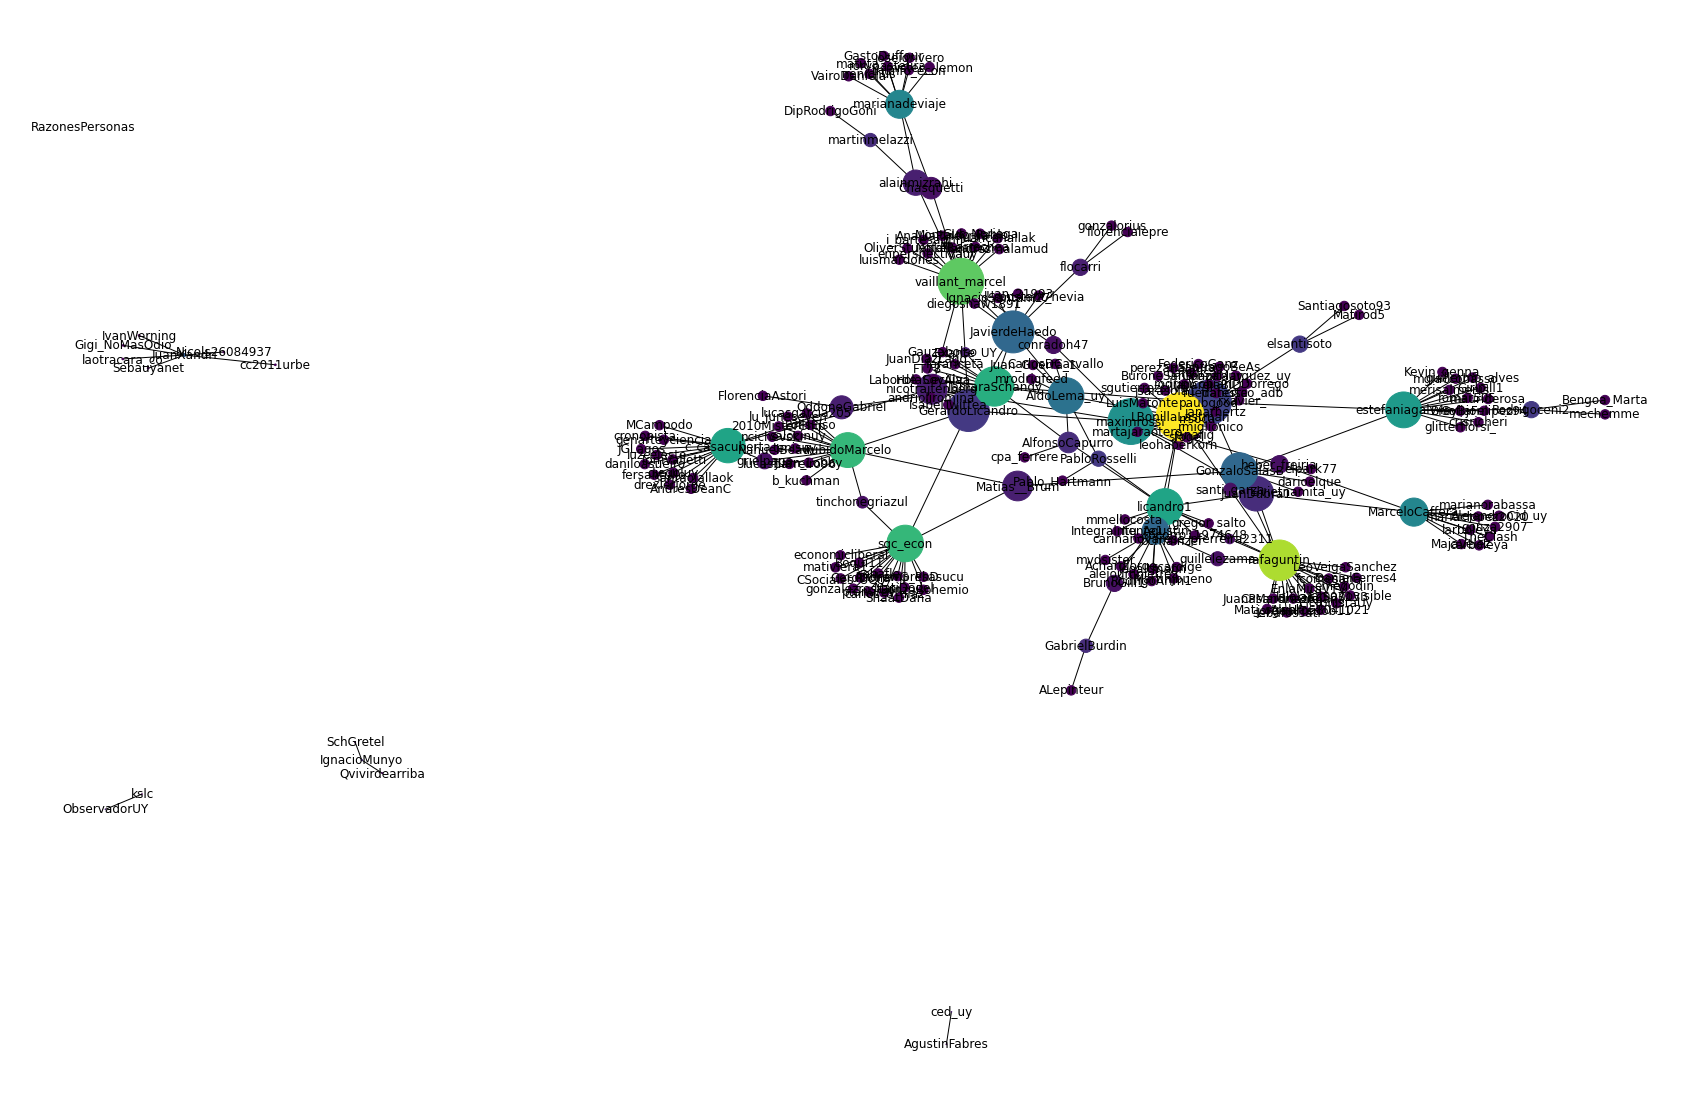

In [17]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(30,20))
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
#plt.figure(figsize=(30,30))

plt.axis('off');

In [18]:
sorted(betCent, key=betCent.get, reverse=True)[:10]


['LBonillaLastman',
 'vaillant_marcel',
 'maximrossi',
 'paubgood',
 'JavierdeHaedo',
 'GerardoLicandro',
 'rafaguntin',
 'TamaraSchandy',
 'sgc_econ',
 'GonzaloSalasB']